# Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Load Data

In [10]:
df = pd.read_csv("../data/reduced_features_has_disease.csv")
X = df.drop(columns= ['has_disease'])
y = df['has_disease']

X

,ca,oldpeak,cp,sex,thalch,exang
0,-1.249371e+00,1.349421,3,1,0.495698,0
1,4.292099e+00,0.589832,0,1,-1.175955,1
2,2.444942e+00,1.634267,0,1,-0.340128,1
3,-1.249371e+00,2.488805,2,1,1.968345,0
4,-1.249371e+00,0.494884,1,0,1.371326,0
...,...,...,...,...,...,...
915,-2.050756e-16,-0.834397,0,0,0.654903,0
916,-2.050756e-16,0.000000,3,1,0.000000,0
917,-2.050756e-16,-0.834397,0,1,-1.494365,0
918,-2.050756e-16,0.000000,0,1,0.000000,0


# Elbow method

In [11]:
inertias = []
K_range = range(1, 21)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot Elbow Curve

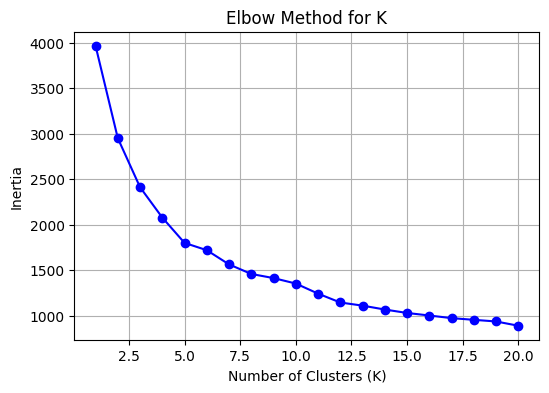

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K')
plt.grid()
plt.show()

# Fit KMeans with Best K-Clusters (K=2)

In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Dendrogram

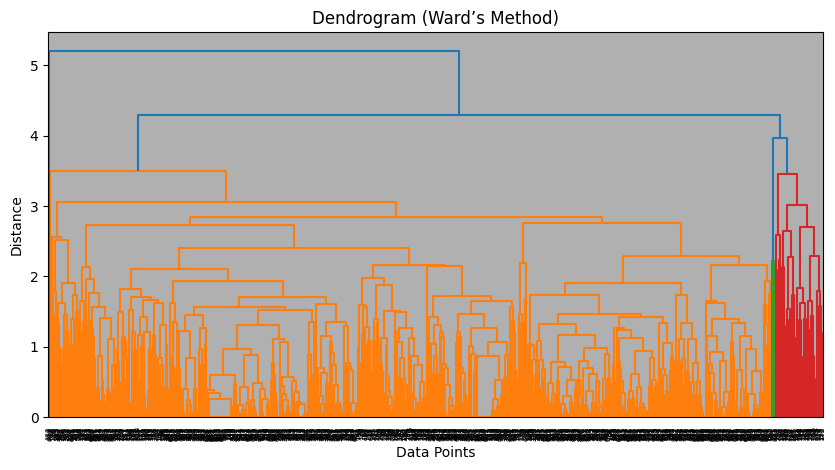

In [14]:
plt.figure(figsize=(10, 5))
sch.dendrogram(sch.linkage(X, method='average'))
plt.title("Dendrogram (Ward’s Method)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.grid()
plt.show()

# Agglomerative Clustering with 2 Clusters

In [15]:
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
hc_labels = hc.fit_predict(X)

# Cluster Comparison with Actual Labels

In [16]:
print("KMeans Clusters vs Actual Labels:\n")
print(pd.crosstab(kmeans_labels, y))

print("\nHierarchical Clusters vs Actual Labels:\n")
print(pd.crosstab(hc_labels, y))


KMeans Clusters vs Actual Labels:

has_disease    0    1
row_0                
0            336  134
1             75  375

Hierarchical Clusters vs Actual Labels:

has_disease    0    1
row_0                
0             75  325
1            336  184
